# Spam Detection using NLP

### Doing the necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import nltk

In [4]:
from nltk.corpus import stopwords

In [5]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
#reading the data from a CSV file into a dataset

In [6]:
messages.head(15)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
messages[messages['label']=='spam']['message'][34]

'Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged'

In [8]:
messages.describe()

,label,message
count,5572,5572
unique,3,5169
top,ham,"Sorry, I'll call later"
freq,4824,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
 ham        1      1  Go until jurong point, crazy.. Available only ...    1
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

**We see that there 747 spam and 4825 non-spam messages in the given dataset. There is repetition of a same message many times**

### Feature Engineering

**Extracting the length of every message and storing it in a new column in the given dataset**

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'Length of message')

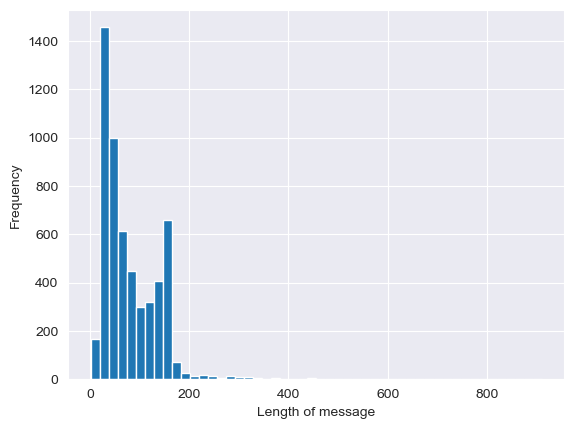

In [12]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=50)
plt.xlabel('Length of message')

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([[<AxesSubplot:title={'center':' ham'}>,
        <AxesSubplot:title={'center':'ham'}>],
       [<AxesSubplot:title={'center':'spam'}>, <AxesSubplot:>]],
      dtype=object)

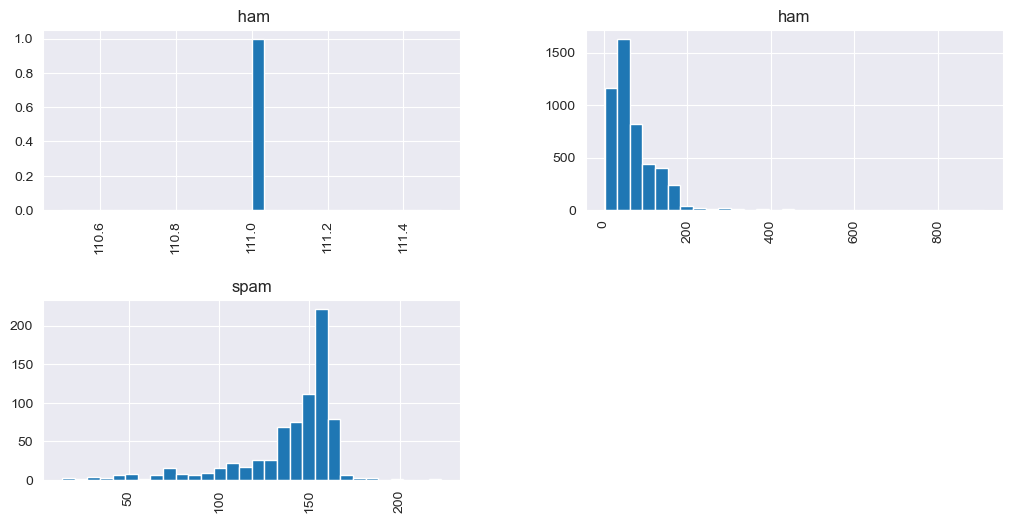

In [13]:
messages.hist(column='length',bins=30,by='label',figsize=(12,6))

**We see a pattern that generally if the length of the message is small, then the message is non-spam and if it is very long, then the message is spam. This is just a general observation and doesn't apply completely. It would be a major factor used in classifying the messages**

### Normalizing the text data

**Given a message, we need to remove the punctuations and common words which are redundant in the process of classifying the messages as spam or not**

In [14]:
ex_msg = 'Message, with punctuation in it!!'

In [15]:
from string import punctuation

In [16]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
ex_msg = [word for word in ex_msg if word not in punctuation]

In [18]:
ex_msg

['M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 't']

**Stopwords is a list of common English words which can be ignored in the process of classification**

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
example_msg = ''.join(ex_msg)

In [21]:
example_msg

'Message with punctuation in it'

In [22]:
example_msg = [word for word in example_msg.split() if word not in stopwords.words('english')]

In [23]:
example_msg

['Message', 'punctuation']

In [24]:
#We can generalize the above process by creating a function to
#1.remove punctuation
#2.remove stopwords and apply it to the 'messages' column in the dataset**

In [25]:
def process_text(mess):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return cleaned words
    '''
    mess = [word for word in mess if word not in punctuation]
    mess = ''.join(mess)
    mess = [word for word in mess.split() if word not in stopwords.words('english')]
    return mess

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
messages['message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

### Train test split

**To train and test the model on a dataset, first we need to split the data. One part would be used to train the model. Then the other part would be used to test the trained model. Here we're splitting the dataset in the ratio 30:70**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [30]:
msg_train

21        I‘m going to try for 2 months ha ha only joking
3111    Good Luck! Draw takes place 28th Feb 06. Good ...
4160             Now got tv 2 watch meh? U no work today?
597                         Gud mrng dear have a nice day
2250    Thanks for your ringtone order, ref number R83...
                              ...                        
2142               Alright took the morphine. Back in yo.
264     Hey I am really horny want to chat or see me n...
2200               Not sure I have the stomach for it ...
1832    Hello- thanx for taking that call. I got a job...
3328                  what number do u live at? Is it 11?
Name: message, Length: 3900, dtype: object

In [31]:
label_train

21       ham
3111    spam
4160     ham
597      ham
2250    spam
        ... 
2142     ham
264     spam
2200     ham
1832     ham
3328     ham
Name: label, Length: 3900, dtype: object

In [32]:
msg_test

4306                Yo come over carlos will be here soon
5408                              ... Are you in the pub?
517     Boltblue tones for 150p Reply POLY# or MONO# e...
2058              Nothing, i got msg frm tht unknown no..
4884    New Theory: Argument wins d SITUATION, but los...
                              ...                        
5262                              Did you see that film:)
3007                       Also hi wesley how've you been
5174    Water logging in desert. Geoenvironmental impl...
5557    No. I meant the calculation is the same. That ...
424     URGENT! Your Mobile number has been awarded wi...
Name: message, Length: 1672, dtype: object

Now, we have the text messages in a normalized form. For Scikit Learn to work with the text provided, it needs to be vectorized.
Machine learning models can work with the vectorized form of messages.

We can do that in the following1 steps using the bag-of-words model:

1. Count how many times does a word occur in each message (term frequency)

2. Weigh the counts, so that frequent words get lower weight (inverse document frequency)

**We need to convert the words of a text message into tokens by replacing the words with their frequency in the text message. This can be achieved using "CountVectorizer" model, which will transform the words into tokens corresponding to their frequency**

**TF-IDF stands for term frequncy - inverse document frequency. TF gives the frequncy of a word in the message while IDF denotes the weight of the word in the message**

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.ensemble  import RandomForestClassifier

We are using a pipeline to  combine the 3 processes,  which include:
1. Creating a bag-of-words using CountVectorizer
2. Noting the frequency and weight of each word in every message
3. Classifying the messages as spam or not using a classification algorithm

In [36]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [37]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x0000022F9E6140D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Model Evaluation

In [38]:
predictions = pipeline.predict(msg_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1451
        spam       1.00      0.69      0.82       221

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672



**We get an accuracy score of 0.96 using Naive Bayes classifier. Let us see the performance of the model using a Random Forest Classifier**

In [41]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [42]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x0000022F9E6140D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [43]:
predictions = pipeline.predict(msg_test)

In [44]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1451
        spam       0.99      0.79      0.88       221

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



**We get an accuracy score of 0.97 in this case which is slightly better than the previous classifier**

We can try some examples to test the model

In [45]:
pipeline.predict(['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'])[0]

'spam'

In [46]:
messages[messages['label']=='spam']['message'].iloc[19]

'PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires'

In [47]:
pipeline.predict(['Hello, I had called u in the evening. please pick up the phone'])[0]

'ham'